# Kristian Blummenfeldt ironman performance - marathon

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import distance
import pytz
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("kristian_blummenfelt_copyright_entalpi_as.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12189 entries, 0 to 12188
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   datetime          12189 non-null  object 
 1   latitude          12189 non-null  float64
 2   longitude         12189 non-null  float64
 3   speed             12189 non-null  float64
 4   elevation         12189 non-null  float64
 5   heartrate         12069 non-null  float64
 6   cadence           12158 non-null  float64
 7   core_temperature  12189 non-null  float64
 8   skin_temperature  12188 non-null  float64
 9   stride_length     9710 non-null   float64
dtypes: float64(9), object(1)
memory usage: 952.4+ KB


## Preprocess the time columns

In [3]:

#create a new time column from UTC time column and set this column as the index of the dataframe
df['datetime'] = pd.to_datetime(df['datetime']).dt.tz_convert('Pacific/Honolulu')
df['time'] = df['datetime'].dt.time
#df.set_index('time', inplace=True)
df.head()

datetime   latitude   longitude  speed  elevation  \
0 2022-10-08 11:27:05-10:00  19.639484 -155.997351  0.000        9.6   
1 2022-10-08 11:27:06-10:00  19.639443 -155.997342  0.000        9.4   
2 2022-10-08 11:27:07-10:00  19.639391 -155.997383  0.000        9.4   
3 2022-10-08 11:27:08-10:00  19.639349 -155.997340  0.000        9.4   
4 2022-10-08 11:27:09-10:00  19.639317 -155.997337  1.148        9.2   

   heartrate  cadence  core_temperature  skin_temperature  stride_length  \
0      138.0      0.0         38.860001               NaN            NaN   
1      139.0      0.0         38.860001         34.200001            NaN   
2      138.0      0.0         38.860001         34.200001            NaN   
3      139.0      0.0         38.860001         34.200001            NaN   
4      139.0      0.0         38.860001         34.200001            NaN   

       time  
0  11:27:05  
1  11:27:06  
2  11:27:07  
3  11:27:08  
4  11:27:09

In [4]:
finish_time = pd.Timestamp.time(pd.Timestamp("14:08:23")) #
df['second'] = df.index
# Filter the dataframe to get the row with the specified time
row = df[df['time'] == finish_time]
finish_time_pos = row.index[0] #--> 9678 the (estimated) finishing time in seconds 
finish_time_pos

9678

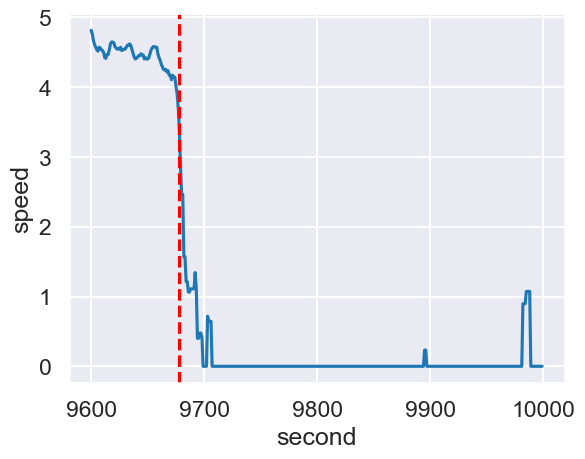

In [5]:
#df['time'] = df['time'].astype(str)
sns.set_style('darkgrid')
sns.set_context('talk')

last_part_of_race = df.iloc[9600:10000]

#create lineplot
ax = sns.lineplot(data=last_part_of_race, x=df['second'], y='speed')
ax.axvline(x=9678, color='r', linestyle='--')
# Display plot
plt.show()

In [6]:
s, h = 60, 60
tot_time = len(df['speed'])
tot_time = tot_time / (s*h)
print(f'The toal time is: {round(tot_time,2)}t, but the actual time was 2:39:21')

The toal time is: 3.39t, but the actual time was 2:39:21


Kristian's official running time was 2:39:21, which means that I need to cut down a lot of the rows from the dataset. From the plot above it is obvious where that could be. Now I can subtract from the official times from the Ironman website to find the starting point. 

In [7]:
marathon_time_s = (2*60*60)+(39*60)+21
start_time = finish_time_pos - marathon_time_s
print(marathon_time_s, start_time)

9561 117


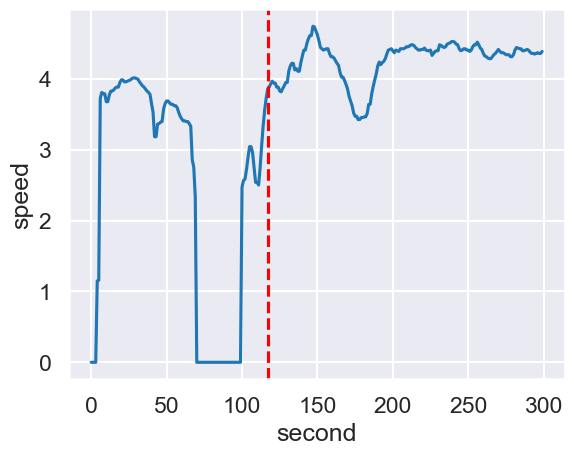

In [8]:
start_of_race = df.iloc[0:300]
ax = sns.lineplot(data=start_of_race, x=df['second'], y='speed')
ax.axvline(x=start_time, color='r', linestyle='--')
plt.show()

No that I've found the start/stopping point I can cut the dataset


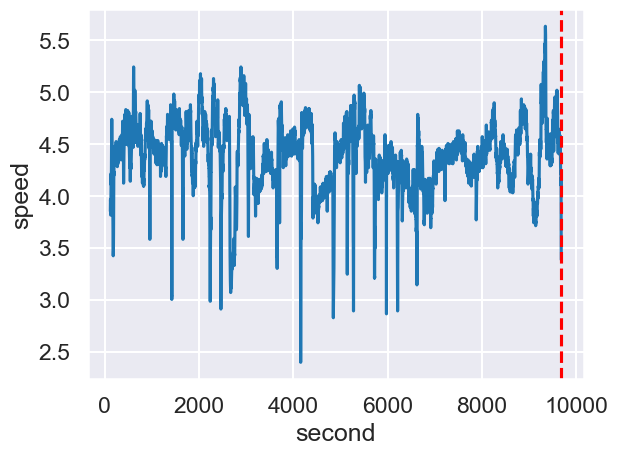

In [9]:
df = df.loc[117:9678]
#df['idx'] = df.index
ax = sns.lineplot(data=df, x=df['second'], y='speed')
ax.axvline(x=9678, color='r', linestyle='--')
plt.show()

In [10]:
df = df.loc[99:9678]
df = df.reset_index(drop=True)
df.describe()

latitude    longitude        speed    elevation    heartrate  \
count  9562.000000  9562.000000  9562.000000  9562.000000  9562.000000   
mean     19.671733  -156.013253     4.393327     2.678331   145.175486   
std       0.038527     0.022330     0.337076    10.849938     3.477294   
min      19.600347  -156.054836     2.398000   -21.800000   133.000000   
25%      19.640012  -156.033176     4.217000    -3.800000   143.000000   
50%      19.671324  -156.015629     4.413000     3.200000   145.000000   
75%      19.714545  -155.992622     4.600000    10.600000   147.000000   
max      19.725848  -155.974404     5.636000    34.600000   158.000000   

           cadence  core_temperature  skin_temperature  stride_length  \
count  9562.000000       9562.000000       9562.000000    9562.000000   
mean     86.575403         39.122708         33.263596       1.544588   
std       1.513255          0.632958          2.587751       0.111035   
min      76.000000         38.240002         25.000000       0.998000   
25%      86.000000         38.840000         33.150002       1.492000   
50%      86.000000         38.959999         34.299999       1.554000   
75%      87.000000         39.099998         34.799999       1.611750   
max      99.000000         40.750000         35.450001       1.885000   

            second  
count  9562.000000  
mean   4897.500000  
std    2760.455971  
min     117.000000  
25%    2507.250000  
50%    4897.500000  
75%    7287.750000  
max    9678.000000

# Longitude and Latitude


In [11]:
window_size = 10

df['longitude'] = df['longitude'].rolling(window_size).mean()
df['latitude'] = df['latitude'].rolling(window_size).mean()


# Speed column

Although The scientific notation for velocity is m/s, it is more readable to read them like km/h. 

In [12]:
#converting from m/s to km/h
kmh = 3.6
df['speed'] = df['speed'] * 3.6

window_size = 5
#smoothing the speed variable
df['speed'] = df['speed'].rolling(window_size).mean()

# Elevation

In [13]:
window_size = 20
df['elevation'] = df['elevation'].rolling(window_size).mean()

# Cadance and stride lenght
Althoug it is perfectly fine to say 80-90 spm, it is commonly to say 180 pr. minute (more accurate).

In [14]:
df['cadence'] = df['cadence'] * 2

window_size = 5
df['cadence'] = df['cadence'].rolling(window_size).mean()
df['stride_length'] = df['stride_length'].rolling(window_size).mean()

# Heartrate, core and skin temperature

In [15]:
window_size = 10
df['core_temperature'] = df['core_temperature'].rolling(window_size).mean()
df['skin_temperature'] = df['skin_temperature'].rolling(window_size).mean()
df['heartrate'] = df['heartrate'].rolling(window_size).mean()

In [16]:
df.describe()

latitude    longitude        speed    elevation    heartrate  \
count  9553.000000  9553.000000  9558.000000  9543.000000  9553.000000   
mean     19.671763  -156.013268    15.816917     2.690911   145.175139   
std       0.038533     0.022334     1.198258    10.832498     3.370886   
min      19.600408  -156.054789     9.586800   -21.730000   133.800000   
25%      19.640021  -156.033180    15.156000    -3.665000   142.900000   
50%      19.671400  -156.015682    15.887520     3.170000   145.000000   
75%      19.714553  -155.992591    16.566480    10.580000   147.200000   
max      19.725844  -155.974408    20.174400    34.360000   156.000000   

           cadence  core_temperature  skin_temperature  stride_length  \
count  9558.000000       9553.000000       9553.000000    9558.000000   
mean    173.151078         39.122070         33.266317       1.544695   
std       2.860902          0.632177          2.582932       0.109538   
min     163.200000         38.240002         25.000000       1.002800   
25%     172.000000         38.840000         33.150001       1.491850   
50%     172.800000         38.959999         34.299999       1.554000   
75%     174.400000         39.099998         34.799999       1.610600   
max     186.800000         40.750000         35.450001       1.881000   

            second  
count  9562.000000  
mean   4897.500000  
std    2760.455971  
min     117.000000  
25%    2507.250000  
50%    4897.500000  
75%    7287.750000  
max    9678.000000

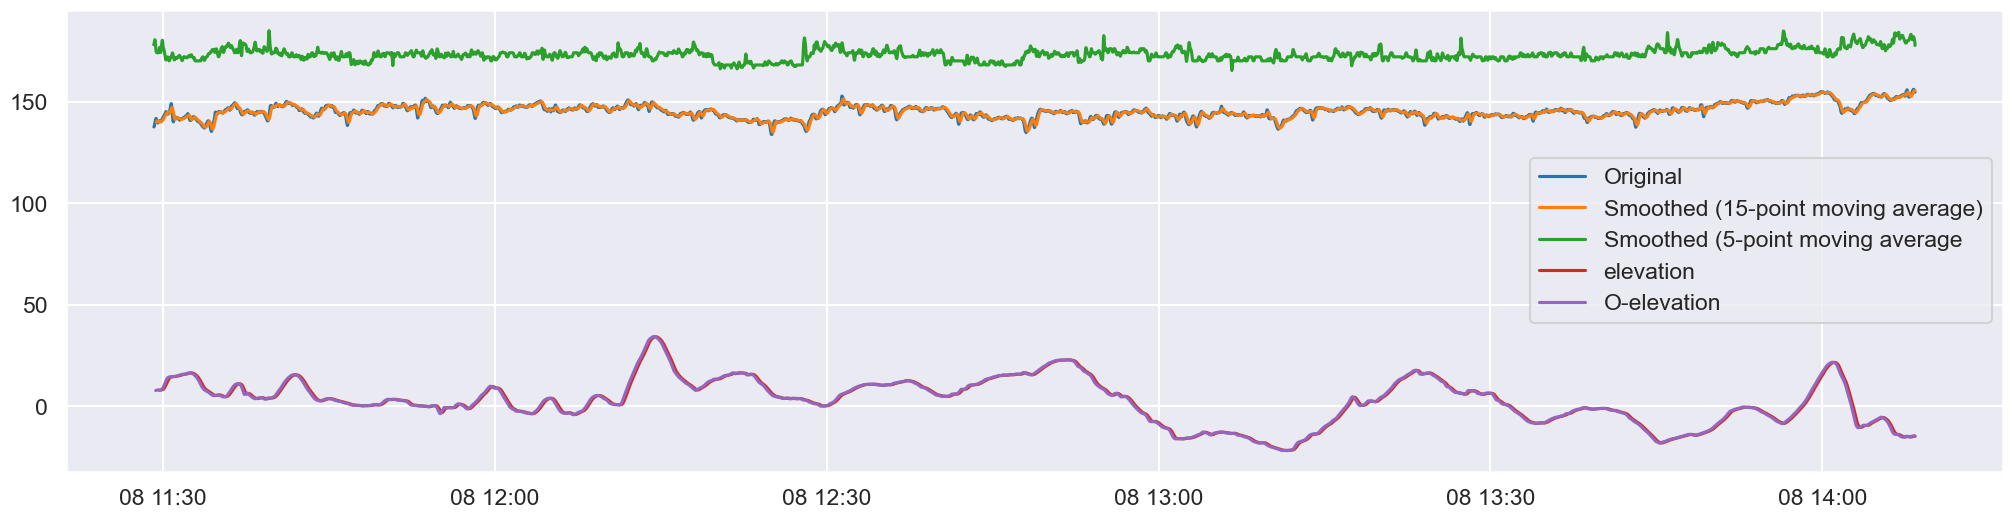

In [17]:
#defining the number of data points to include in the moving average window
window_size = 15
s, ss = 5, 20
#calculating the moving average of the 'heartrate' column
smoothed_hr = df['heartrate'].rolling(window_size).mean()
smoothed_cdnc = df['cadence'].rolling(s).mean()
smoothed_elevation = df['elevation'].rolling(ss).mean()
#plot the original and smoothed 'heartrate' data
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(25, 6))
ax.plot(df['datetime'], df['heartrate'], label='Original')
ax.plot(df['datetime'], smoothed_hr, label=f'Smoothed ({window_size}-point moving average)')
ax.plot(df['datetime'], smoothed_cdnc, label=f'Smoothed ({s}-point moving average')
ax.plot(df['datetime'], smoothed_elevation, label=f'elevation')
ax.plot(df['datetime'], df['elevation'], label=f'O-elevation')
ax.legend()
plt.show()

In [18]:
df_clean = df.dropna()

#checking the length of the new DataFrame
print("Length of the original DataFrame:", len(df))
print("Length of the new DataFrame without NaN values:", len(df_clean))

Length of the original DataFrame: 9562
Length of the new DataFrame without NaN values: 9543


In [19]:

df = df.loc[19:]
df = df.reset_index(drop=True)


In [21]:
df['second'] = df['second'] - 136

df.head()

datetime   latitude   longitude     speed  elevation  \
0 2022-10-08 11:29:21-10:00  19.640241 -155.996947  15.03432       7.84   
1 2022-10-08 11:29:22-10:00  19.640273 -155.996922  14.98104       7.88   
2 2022-10-08 11:29:23-10:00  19.640307 -155.996900  14.90112       7.92   
3 2022-10-08 11:29:24-10:00  19.640342 -155.996884  14.90832       7.94   
4 2022-10-08 11:29:25-10:00  19.640378 -155.996875  15.04944       7.96   

   heartrate  cadence  core_temperature  skin_temperature  stride_length  \
0      141.2    174.8         38.849998              34.5         1.2632   
1      141.5    174.4         38.849998              34.5         1.2842   
2      141.7    174.0         38.849998              34.5         1.2940   
3      141.3    174.0         38.849998              34.5         1.3194   
4      141.0    174.0         38.849998              34.5         1.3468   

       time  second  
0  11:29:21       0  
1  11:29:22       1  
2  11:29:23       2  
3  11:29:24       3  
4  11:29:25       4

# Creating a distance and 1km column

In [22]:
from geopy.distance import geodesic

In [23]:
import pandas as pd
from geopy.distance import geodesic

#function for calculating geo distance
def calculate_distance(row1, row2):
    point1 = (row1['latitude'], row1['longitude'])
    point2 = (row2['latitude'], row2['longitude'])
    return geodesic(point1, point2).kilometers

df['distance'] = 0
for i in range(1, len(df)):
    df.loc[df.index[i], 'distance'] = df.loc[df.index[i - 1], 'distance'] + \
                                      calculate_distance(df.loc[df.index[i]], df.loc[df.index[i - 1]])

#df.describe()


In [24]:
bins = np.arange(0, df['distance'].max() + 1, 1)
df['distance_1km'] = pd.cut(df['distance'], bins=bins)

In [26]:
print(len(df['speed']), len(df_clean['speed']))

9543 9543


# MAP PLOT

In [27]:
import folium
from folium.plugins import PolyLineTextPath
from folium.plugins import TimestampedGeoJson

In [28]:
df_kristian = df

cordinates_kristian = list(zip(df_kristian['latitude'], df_kristian['longitude']))

min_pace = df_kristian['speed'].quantile(0.1)
max_pace = 20.174400

m = folium.Map(location=cordinates_kristian[0], zoom_start=12)

colors = ['red', 'yellow', 'green', 'blue', 'purple']
color_scale = folium.LinearColormap(colors=colors, vmin=min_pace, vmax=max_pace)

for i in range(len(cordinates_kristian)-1):
    pace = df_kristian.loc[i, 'speed'] # get pace from dataset
    color = color_scale(pace) # map pace to color scale
    folium.PolyLine(locations=[cordinates_kristian[i], cordinates_kristian[i+1]], 
                    color=color).add_to(m)

l = [cordinates_kristian[0], cordinates_kristian[-1]]    

s = 'Start'
f = 'Finish'
folium.Marker(location=l[0], icon=folium.Icon(color='green', icon='play-circle', tooltip=s)).add_to(m)
folium.Marker(location=l[1], icon=folium.Icon(color='red', icon='stop-circle', tooltip=f)).add_to(m)


          
#adding color scale to map
color_scale.add_to(m)

#m.save('kristian-marathon.html')
#m

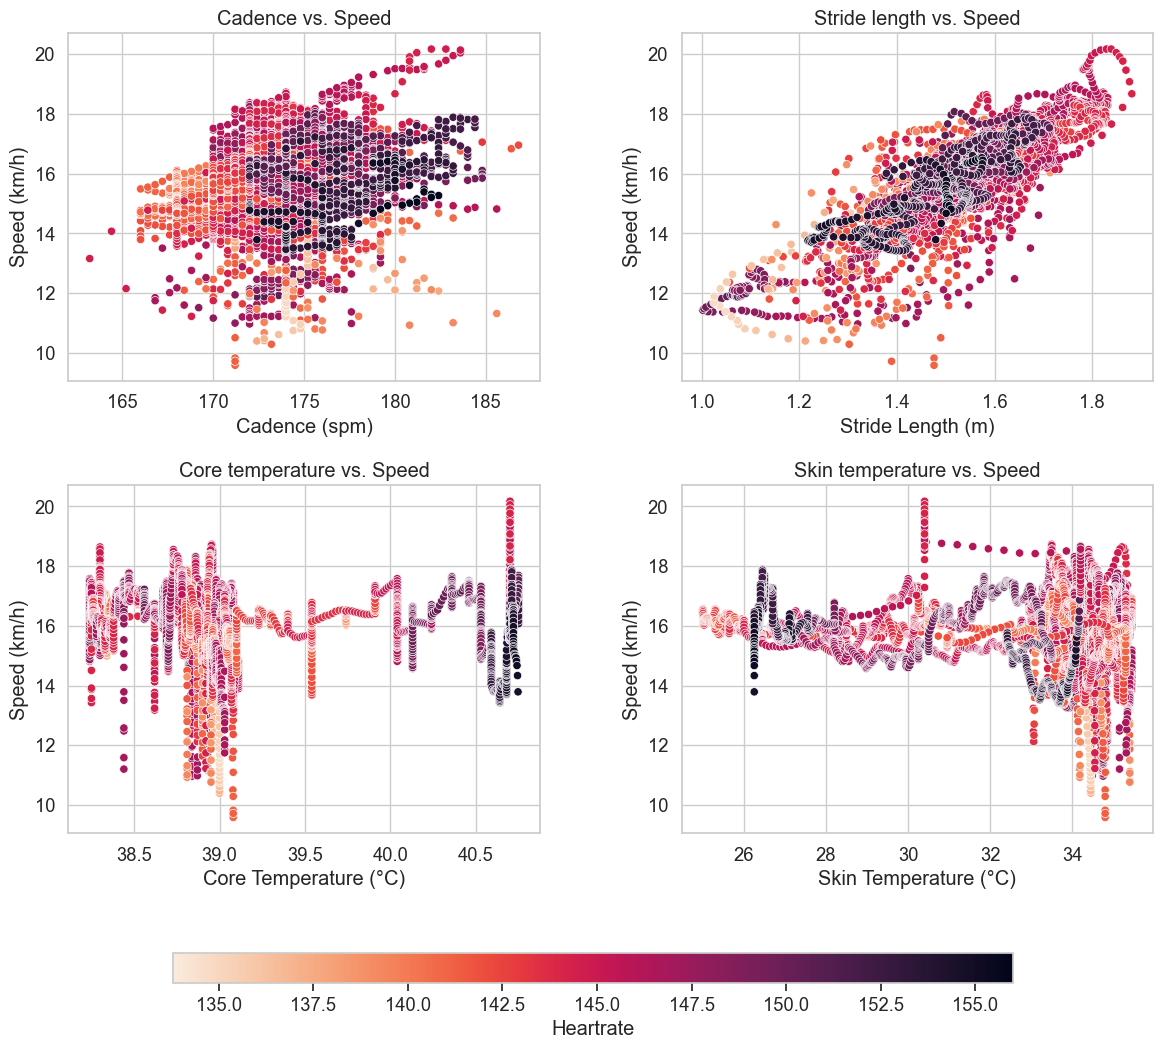

In [95]:

df_clean = df.dropna(subset=['speed', 'cadence', 'stride_length', 'core_temperature', 'skin_temperature', 'heartrate'])

sns.set(style="whitegrid", font_scale=1.2)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

norm = plt.Normalize(df_clean['heartrate'].min(), df_clean['heartrate'].max())
cmap = sns.color_palette("rocket_r", as_cmap=True)

#speed vs. cadence
sns.scatterplot(data=df_clean, x='cadence',
                y='speed', hue='heartrate',
                palette=cmap, ax=axes[0, 0],
                legend=False)
axes[0, 0].set_xlabel('Cadence (spm)')
axes[0, 0].set_ylabel('Speed (km/h)')
axes[0, 0].set_title('Cadence vs. Speed')

#speed vs. stride length
sns.scatterplot(data=df_clean, x='stride_length',
                y='speed', hue='heartrate',
                palette=cmap, ax=axes[0, 1],
                legend=False)
axes[0, 1].set_xlabel('Stride Length (m)')
axes[0, 1].set_ylabel('Speed (km/h)')
axes[0, 1].set_title('Stride length vs. Speed')

#speed vs. core temp
sns.scatterplot(data=df_clean, x='core_temperature',
                y='speed', hue='heartrate',
                palette=cmap, ax=axes[1, 0],
                legend=False)
axes[1, 0].set_xlabel('Core Temperature (°C)')
axes[1, 0].set_ylabel('Speed (km/h)')
axes[1, 0].set_title('Core temperature vs. Speed')

#speed vs. Skin temp
sns.scatterplot(data=df_clean, x='skin_temperature',
                y='speed', hue='heartrate',
                palette=cmap, ax=axes[1, 1],
                legend=False)
axes[1, 1].set_xlabel('Skin Temperature (°C)')
axes[1, 1].set_ylabel('Speed (km/h)')
axes[1, 1].set_title('Skin temperature vs. Speed')

# colorbar that follows heartrate hue
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

#colorbar that goes under all of the plots
cbar_ax = fig.add_axes([0.2, 0.05, 0.6, 0.03])
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal', label='Heartrate')

#adjust the position of the axes
plt.subplots_adjust(bottom=0.2, wspace=0.3, hspace=0.3, top=1)
#fig.savefig('plots/x-vs-speed.png')
plt.show()


In [30]:
#df.info()

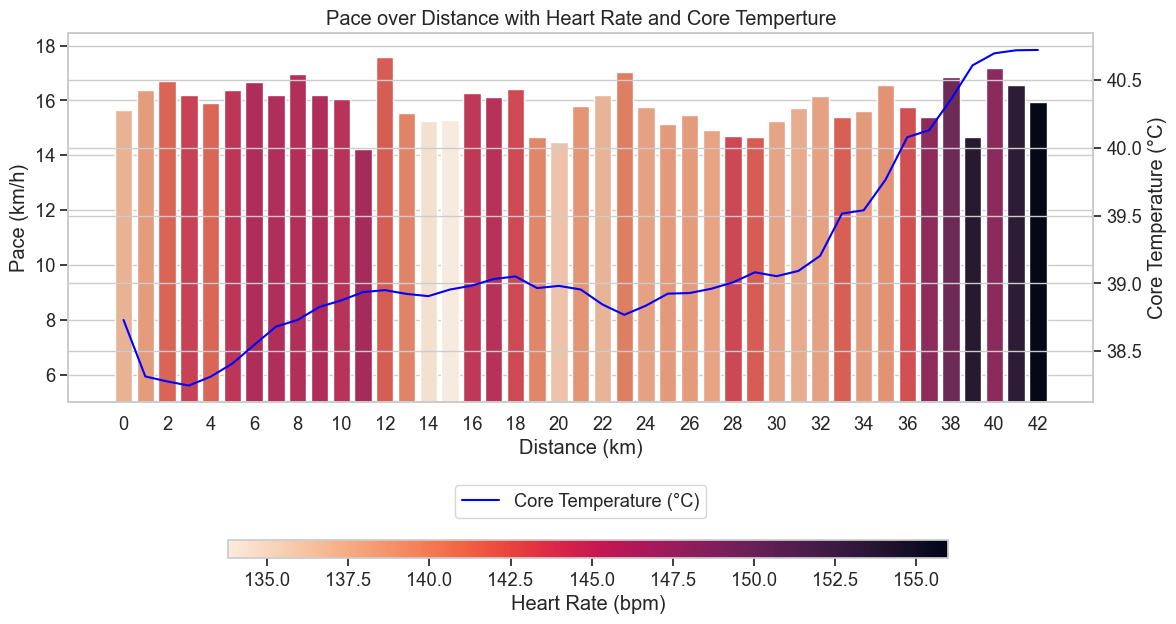

In [31]:
#average values for each 1km interval
grouped = df.groupby('distance_1km').agg({'speed': 'mean',
                                          'heartrate': 'mean',
                                          'core_temperature': 'mean'}).reset_index()

#normalize heartrate values to range [0, 1]
normalized_heartrate = (grouped['heartrate'] - grouped['heartrate'].min()) / (grouped['heartrate'].max() - grouped['heartrate'].min())
palette = sns.color_palette('rocket_r', as_cmap=True)

#map normalized heartrate values to colors from the rocket_r palette
colors = palette(normalized_heartrate)

fig, ax1 = plt.subplots(figsize=(12, 6))

sns.barplot(x=grouped.index, y='speed', data=grouped, palette=colors, ax=ax1)

ax1.set_xlabel('Distance (km)')
ax1.set_ylabel('Pace (km/h)')
ax1.set_xticks(ax1.get_xticks()[::2])
ax1.set_ylim(5, ax1.get_ylim()[1])


# colorbar that follows heartrate hue
norm = plt.Normalize(df_clean['heartrate'].min(), df_clean['heartrate'].max())
cmap = sns.color_palette("rocket_r", as_cmap=True)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar_ax = fig.add_axes([0.2, 0.05, 0.6, 0.03])
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal', label='Heart Rate (bpm)')


#second y-axis for core temperature
ax2 = ax1.twinx()

#core_temperature plot
sns.lineplot(x=grouped.index, y='core_temperature',
             data=grouped, color='blue',
             ax=ax2, label='Core Temperature (°C)')

ax2.set_ylabel('Core Temperature (°C)')

ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=1)

ax1.set_title('Pace over Distance with Heart Rate and Core Temperture')

# plot and save
plt.tight_layout(rect=[0, 0.05, 1, 1])
fig.savefig('plots/pace-heart-core.png')
plt.show()

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9543 entries, 0 to 9542
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype                           
---  ------            --------------  -----                           
 0   datetime          9543 non-null   datetime64[ns, Pacific/Honolulu]
 1   latitude          9543 non-null   float64                         
 2   longitude         9543 non-null   float64                         
 3   speed             9543 non-null   float64                         
 4   elevation         9543 non-null   float64                         
 5   heartrate         9543 non-null   float64                         
 6   cadence           9543 non-null   float64                         
 7   core_temperature  9543 non-null   float64                         
 8   skin_temperature  9543 non-null   float64                         
 9   stride_length     9543 non-null   float64                         
 10  time              9543 n

Index(['datetime', 'latitude', 'longitude', 'speed', 'elevation', 'heartrate',
       'cadence', 'core_temperature', 'skin_temperature', 'stride_length',
       'time', 'second', 'distance', 'distance_1km', 'speed_quantiles'],
      dtype='object')


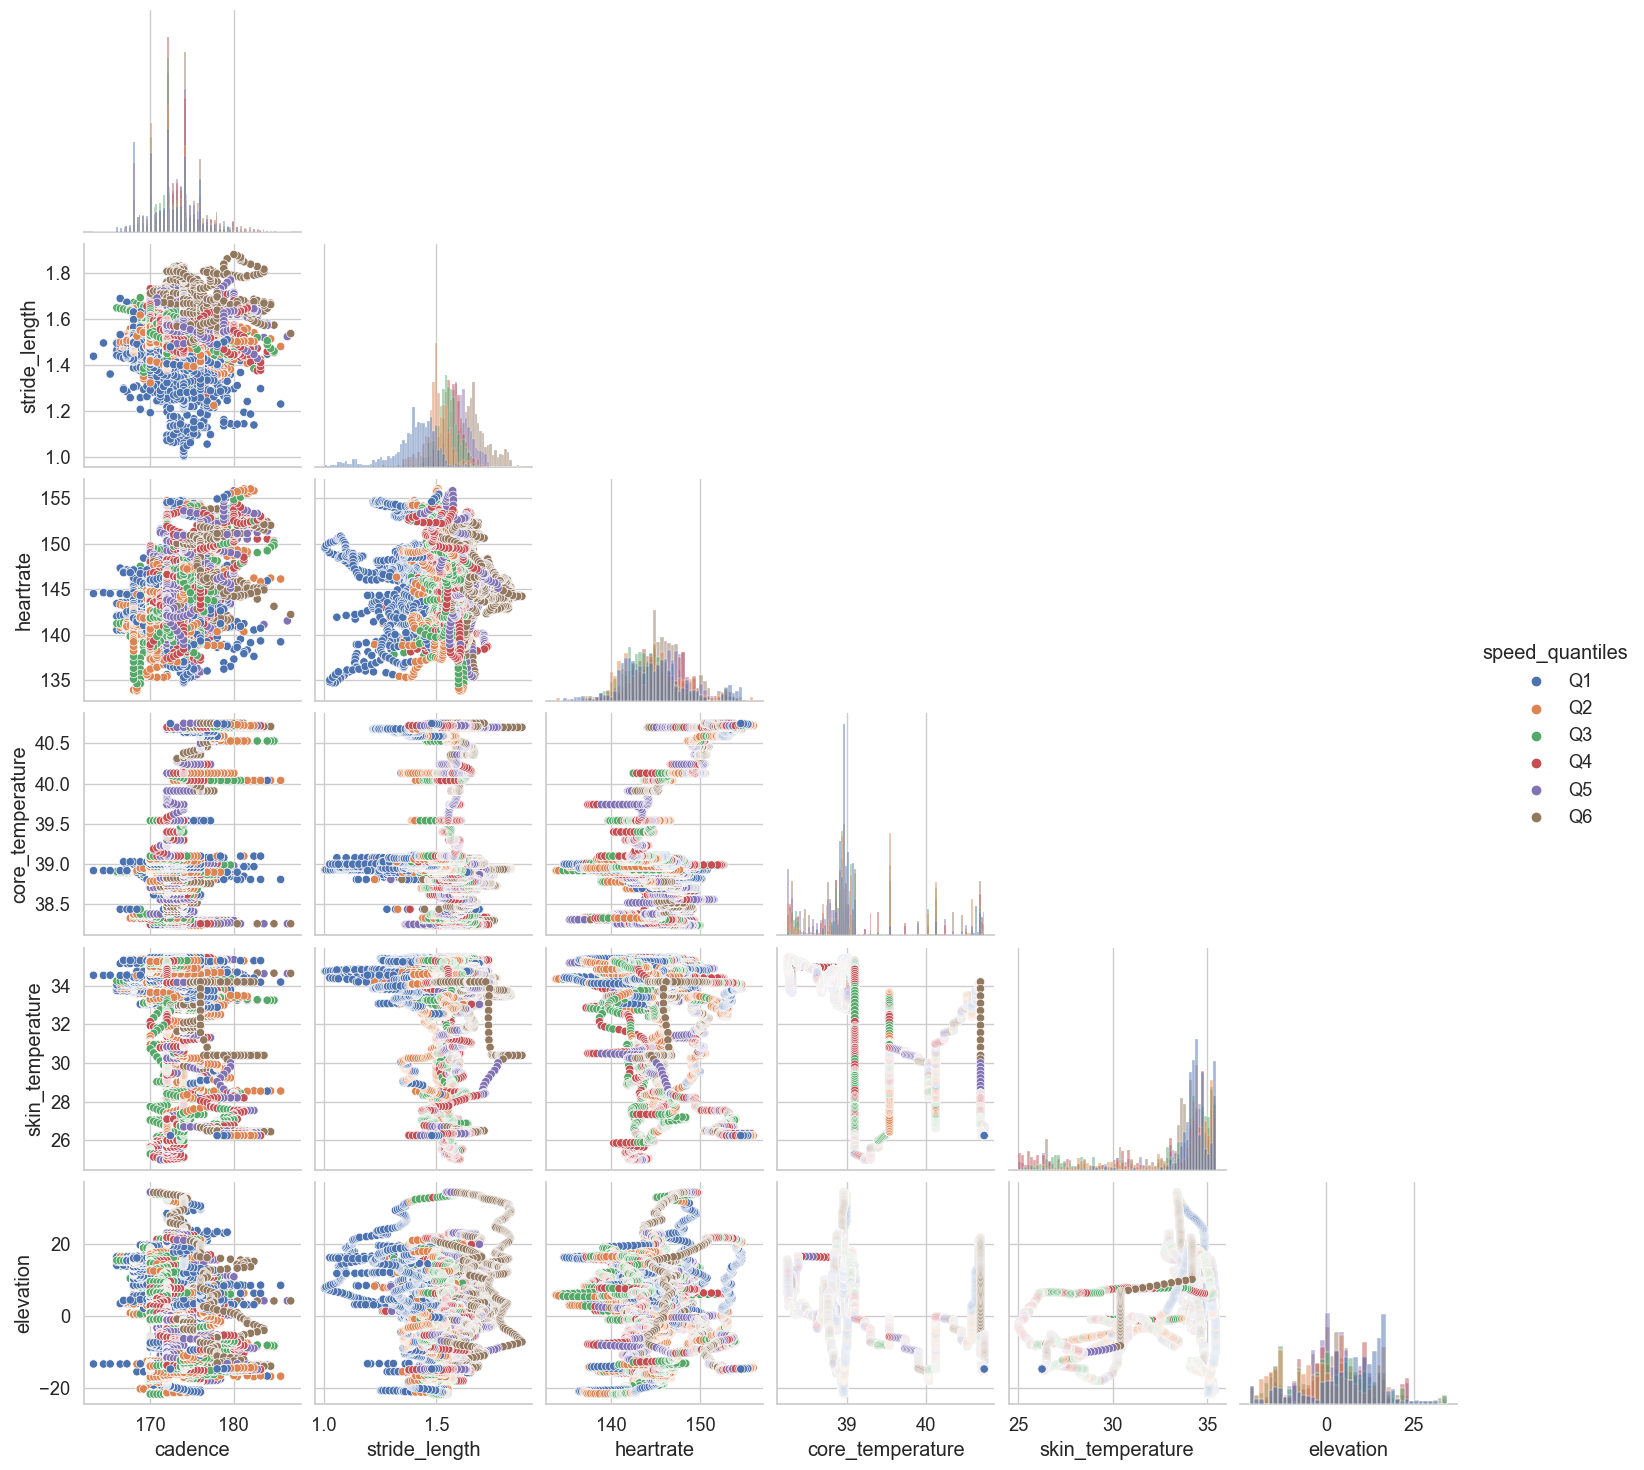

In [33]:
# making quantiles on the speed column
quantile_labels = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6']
df['speed_quantiles'] = pd.qcut(df['speed'], q=6, labels=quantile_labels)

# Check if the 'speed_quantiles' column exists in your DataFrame
print(df.columns)

# Specify the columns to include in the scatterplot matrix
columns_to_plot = ['cadence', 'stride_length', 'heartrate', 'core_temperature', 'skin_temperature', 'elevation', 'speed_quantiles']

# Create a scatterplot matrix for the specified columns
g = sns.pairplot(df[columns_to_plot], hue='speed_quantiles', diag_kind='hist', corner=True)

# Show the plot
plt.show()

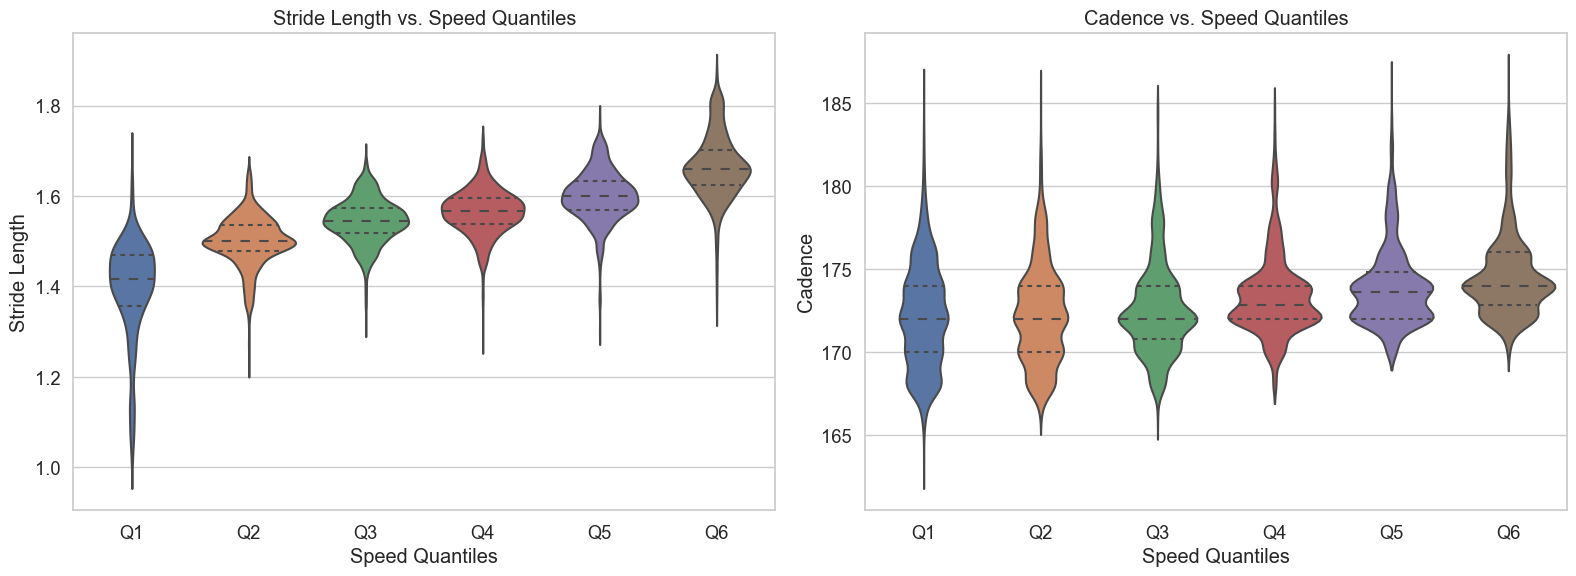

In [34]:
labels = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6']
df['speed_quant'] = pd.qcut(df['speed'], q=6, labels=labels)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

sns.violinplot(x='speed_quant', y='stride_length', data=df, ax=ax1, inner="quartile")
ax1.set_xlabel('Speed Quantiles')
ax1.set_ylabel('Stride Length')
ax1.set_title('Stride Length vs. Speed Quantiles')

sns.violinplot(x='speed_quant', y='cadence', data=df, ax=ax2, inner="quartile")
ax2.set_xlabel('Speed Quantiles')
ax2.set_ylabel('Cadence')
ax2.set_title('Cadence vs. Speed Quantiles')

plt.tight_layout()
fig.savefig('plots/violin.png')
plt.show()

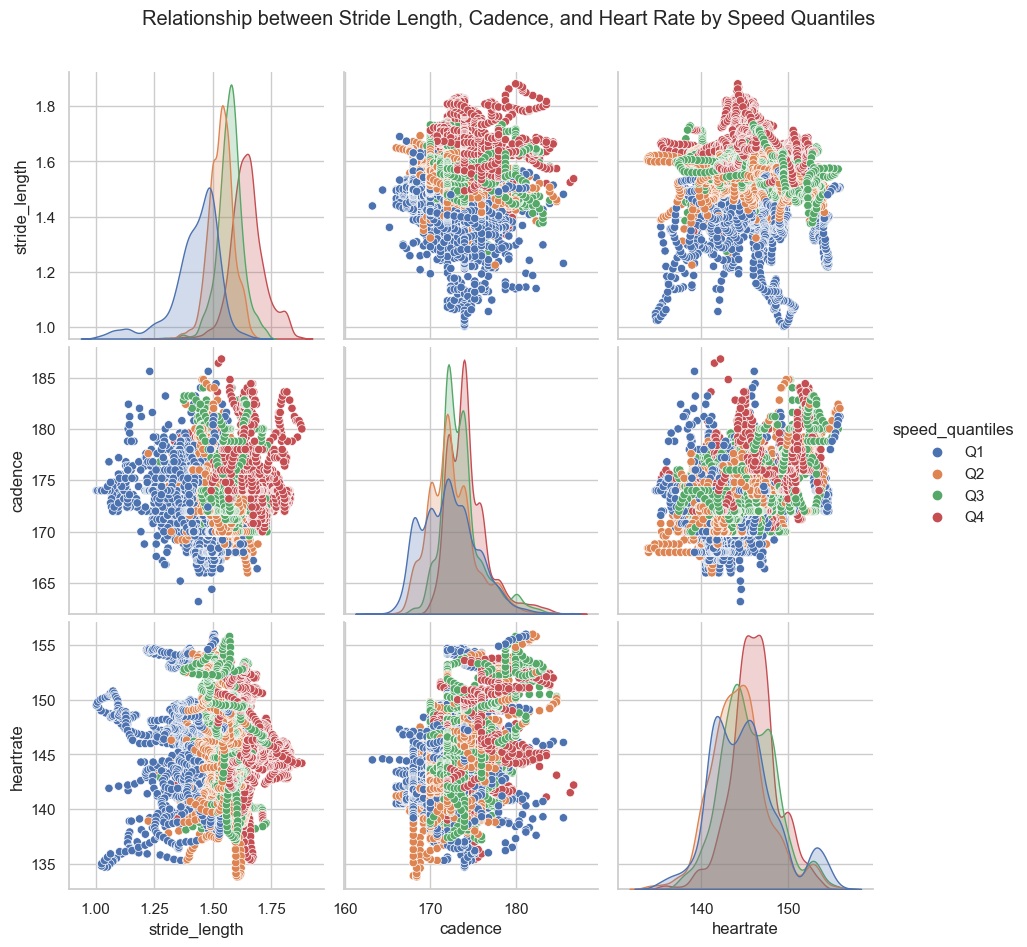

In [91]:
sns.set_style('whitegrid')


g = sns.pairplot(data=df, vars=['stride_length', 'cadence', 'heartrate'],
                 hue='speed_quantiles',
                 height=3)


g.fig.suptitle('Relationship between Stride Length, Cadence, and Heart Rate by Speed Quantiles',
               y=1.05)

g.savefig('plots/relation-pp.png')

plt.show()

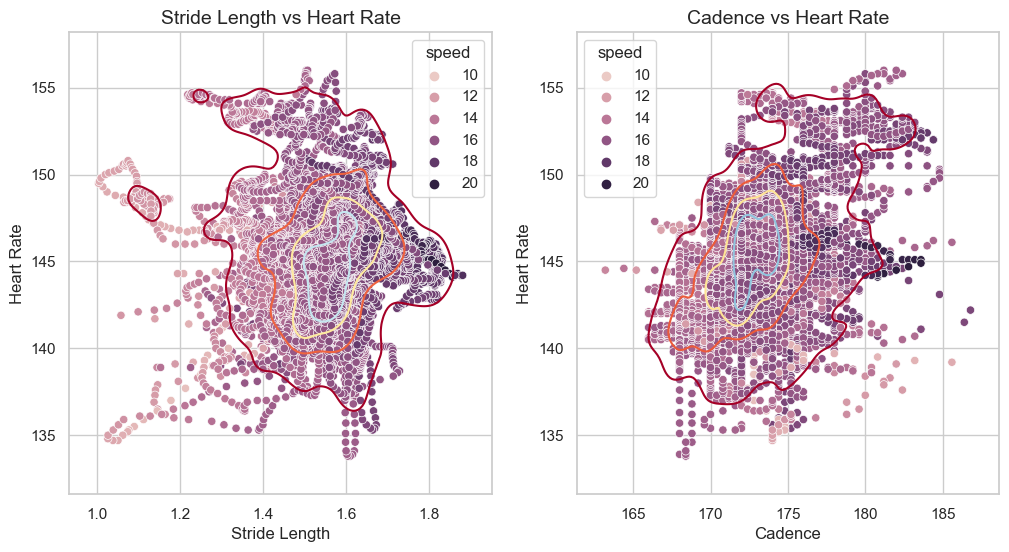

In [45]:
sns.set(style='whitegrid')

#subplots side by side
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))

#scatterplots for stride length and heart rate, and cadence and heart rate
sns.scatterplot(x='stride_length', y='heartrate', hue='speed', data=df, ax=ax1)
sns.kdeplot(x='stride_length', y='heartrate', cmap='RdYlBu',
            data=df, ax=ax1, levels=5, contour=10)

sns.scatterplot(x='cadence', y='heartrate', hue='speed', data=df, ax=ax2)
sns.kdeplot(x='cadence', y='heartrate', cmap='RdYlBu',
            data=df, ax=ax2, levels=5, contour=10)

#set axis labels and titles
ax1.set_xlabel('Stride Length', fontsize=12)
ax1.set_ylabel('Heart Rate', fontsize=12)
ax1.set_title('Stride Length vs Heart Rate', fontsize=14)
ax2.set_xlabel('Cadence', fontsize=12)
ax2.set_ylabel('Heart Rate', fontsize=12)
ax2.set_title('Cadence vs Heart Rate', fontsize=14)


fig.savefig('plots/scatter-hrm-step.png')

plt.show()


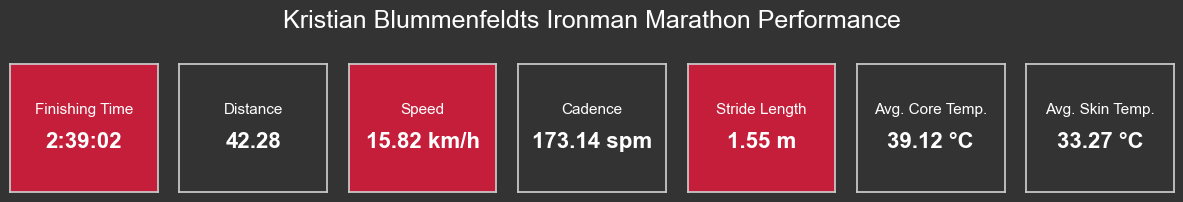

In [73]:
import datetime
#calculating the total time between the first and last datetime values
start_time, finish_time = df['datetime'].iloc[0], df['datetime'].iloc[-1]
tot_time = finish_time - start_time
total_seconds = tot_time.total_seconds()
tot_time = str(datetime.timedelta(seconds=total_seconds))

#mean values from dataframe
mean_speed = round(df['speed'].mean(), 2)
mean_cadence = round(df['cadence'].mean(), 2)
mean_stride_length = round(df['stride_length'].mean(), 2)
mean_core_temperature = round(df['core_temperature'].mean(), 2)
mean_skin_temperature = round(df['skin_temperature'].mean(), 2)
len_marathon = round(df['distance'].iloc[-1],2)

# Define the titles and subtitles for each cell
data = [[['Finishing Time', tot_time],
         ['Distance', len_marathon],
         ['Speed', f'{mean_speed} km/h'],
         ['Cadence', f'{mean_cadence} spm'],
         ['Stride Length', f'{mean_stride_length} m'],
         ['Avg. Core Temp.', f'{mean_core_temperature} °C'],
         ['Avg. Skin Temp.', f'{mean_skin_temperature} °C']]]

# Create a 2x6 grid of subplots
fig, axs = plt.subplots(1, 7, figsize=(12, 2.05))

# Define the color scheme
red, black = '#C41E3A', '#333333'
colors = [red, black, red, black, red, black,
          black, red, black, red, black, red]

#loop through each tile and plot the data
for j in range(7):
    # Set the background color of the tile
    axs[j].set_facecolor(colors[j])

    # Add the key statistics to the tile
    title, subtitle = data[0][j]
    axs[j].text(0.5, 0.65, title, fontsize=11, ha='center', va='center', color='white')
    axs[j].text(0.5, 0.4, subtitle, fontsize=16, ha='center', va='center', fontweight='bold', color='white')

    # Remove the ticks and axis labels from the tile
    axs[j].set_xticks([])
    axs[j].set_yticks([])
    axs[j].set_xticklabels([])
    axs[j].set_yticklabels([])

# Set the plot title
fig.suptitle('Kristian Blummenfeldts Ironman Marathon Performance', fontsize=18, color='white')

# Set the background color of the plot
fig.patch.set_facecolor('#333333')

# Adjust the layout
fig.tight_layout()

fig.savefig('plots/overall-stats.png')
plt.show()


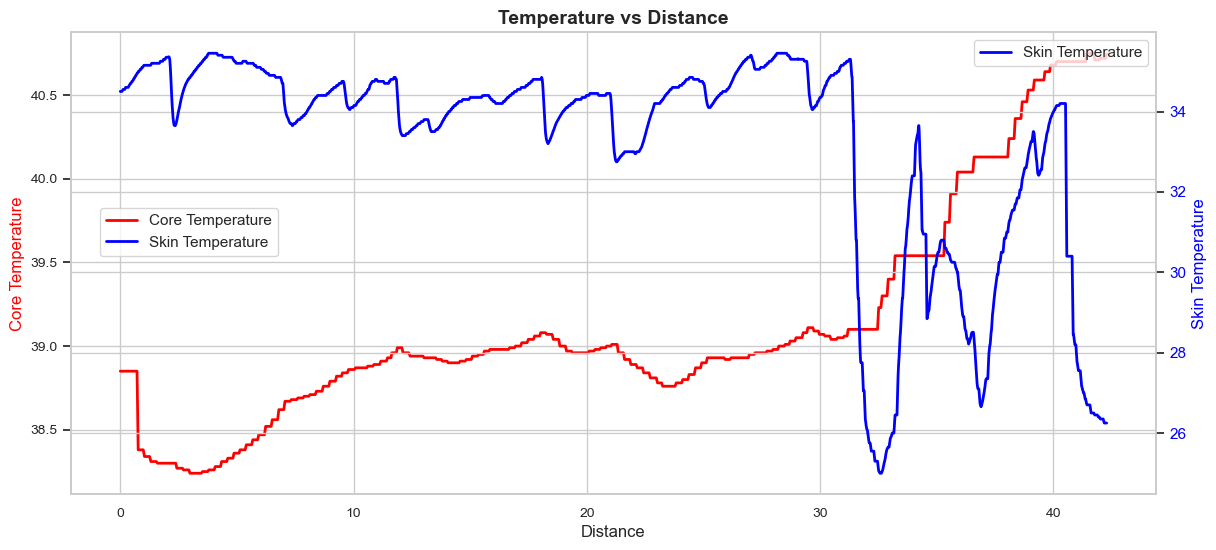

In [89]:

sns.set_style('whitegrid')

fig, ax1 = plt.subplots(figsize=(14,6))
ax2 = ax1.twinx()

sns.lineplot(x='distance', y='core_temperature', data=df, label='Core Temperature', ax=ax1, color='red', linewidth=2)
sns.lineplot(x='distance', y='skin_temperature', data=df, label='Skin Temperature', ax=ax2, color='blue', linewidth=2)

#plot title, labels, and legend
ax1.set_title('Temperature vs Distance', fontsize=14, fontweight='bold')
ax1.set_xlabel('Distance', fontsize=12)
ax1.set_ylabel('Core Temperature', fontsize=12, color='red')
ax1.tick_params(axis='both', labelsize=10)

ax2.set_ylabel('Skin Temperature', fontsize=12, color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

#creating a single legend 
ax1.legend(handles, labels, loc='lower left', bbox_to_anchor=(0.02, 0.5))

plt.show()


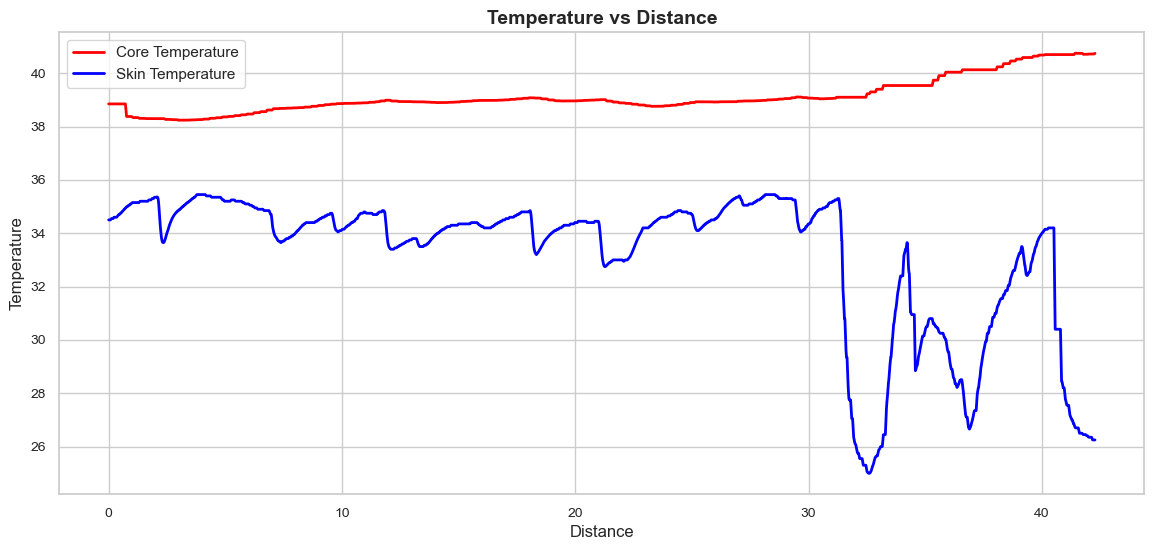

In [38]:
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(14,6))

sns.lineplot(x='distance', y='core_temperature', data=df, label='Core Temperature', ax=ax, color='red', linewidth=2)
sns.lineplot(x='distance', y='skin_temperature', data=df, label='Skin Temperature', ax=ax, color='blue', linewidth=2)

#plot title, labels, and legend
ax.set_title('Temperature vs Distance', fontsize=14, fontweight='bold')
ax.set_xlabel('Distance', fontsize=12)
ax.set_ylabel('Temperature', fontsize=12)
ax.tick_params(axis='both', labelsize=10)
ax.legend()

fig.savefig('plots/temp-dist.png')
plt.show()

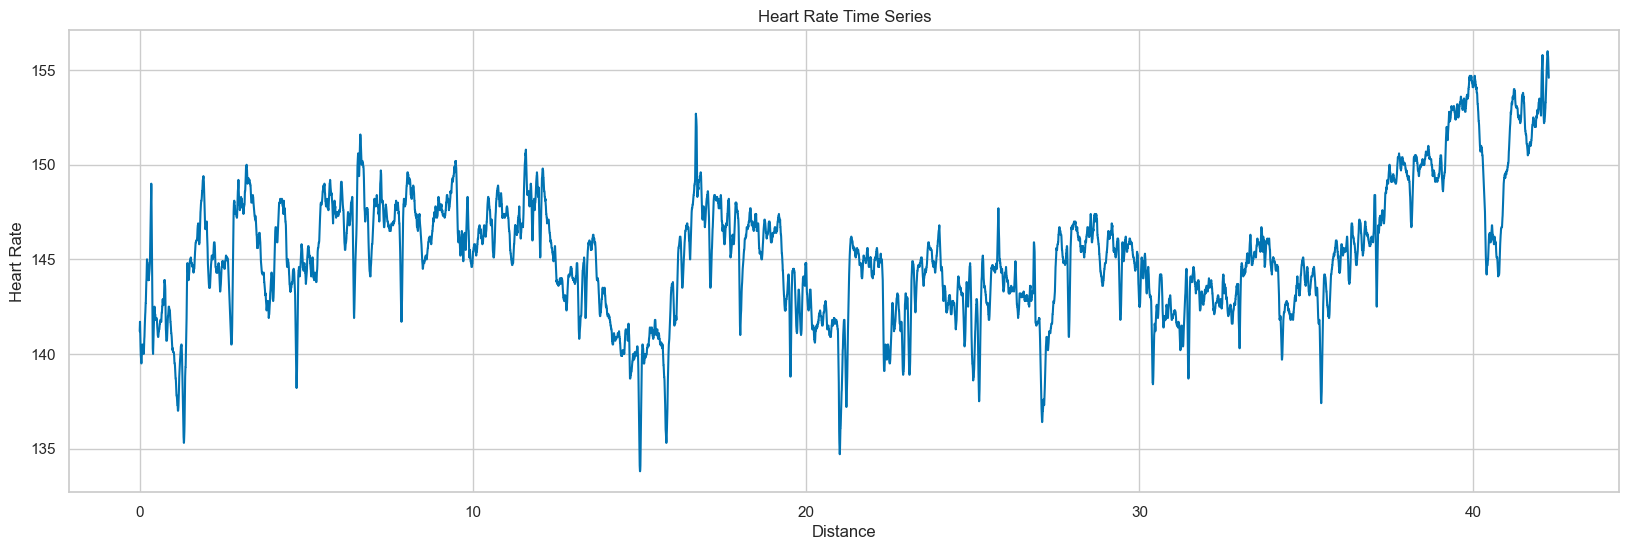

In [39]:
plt.figure(figsize=(20, 6))
plt.plot(df['distance'], df['heartrate'])
plt.xlabel('Distance')
plt.ylabel('Heart Rate')
plt.title('Heart Rate Time Series')
plt.show()

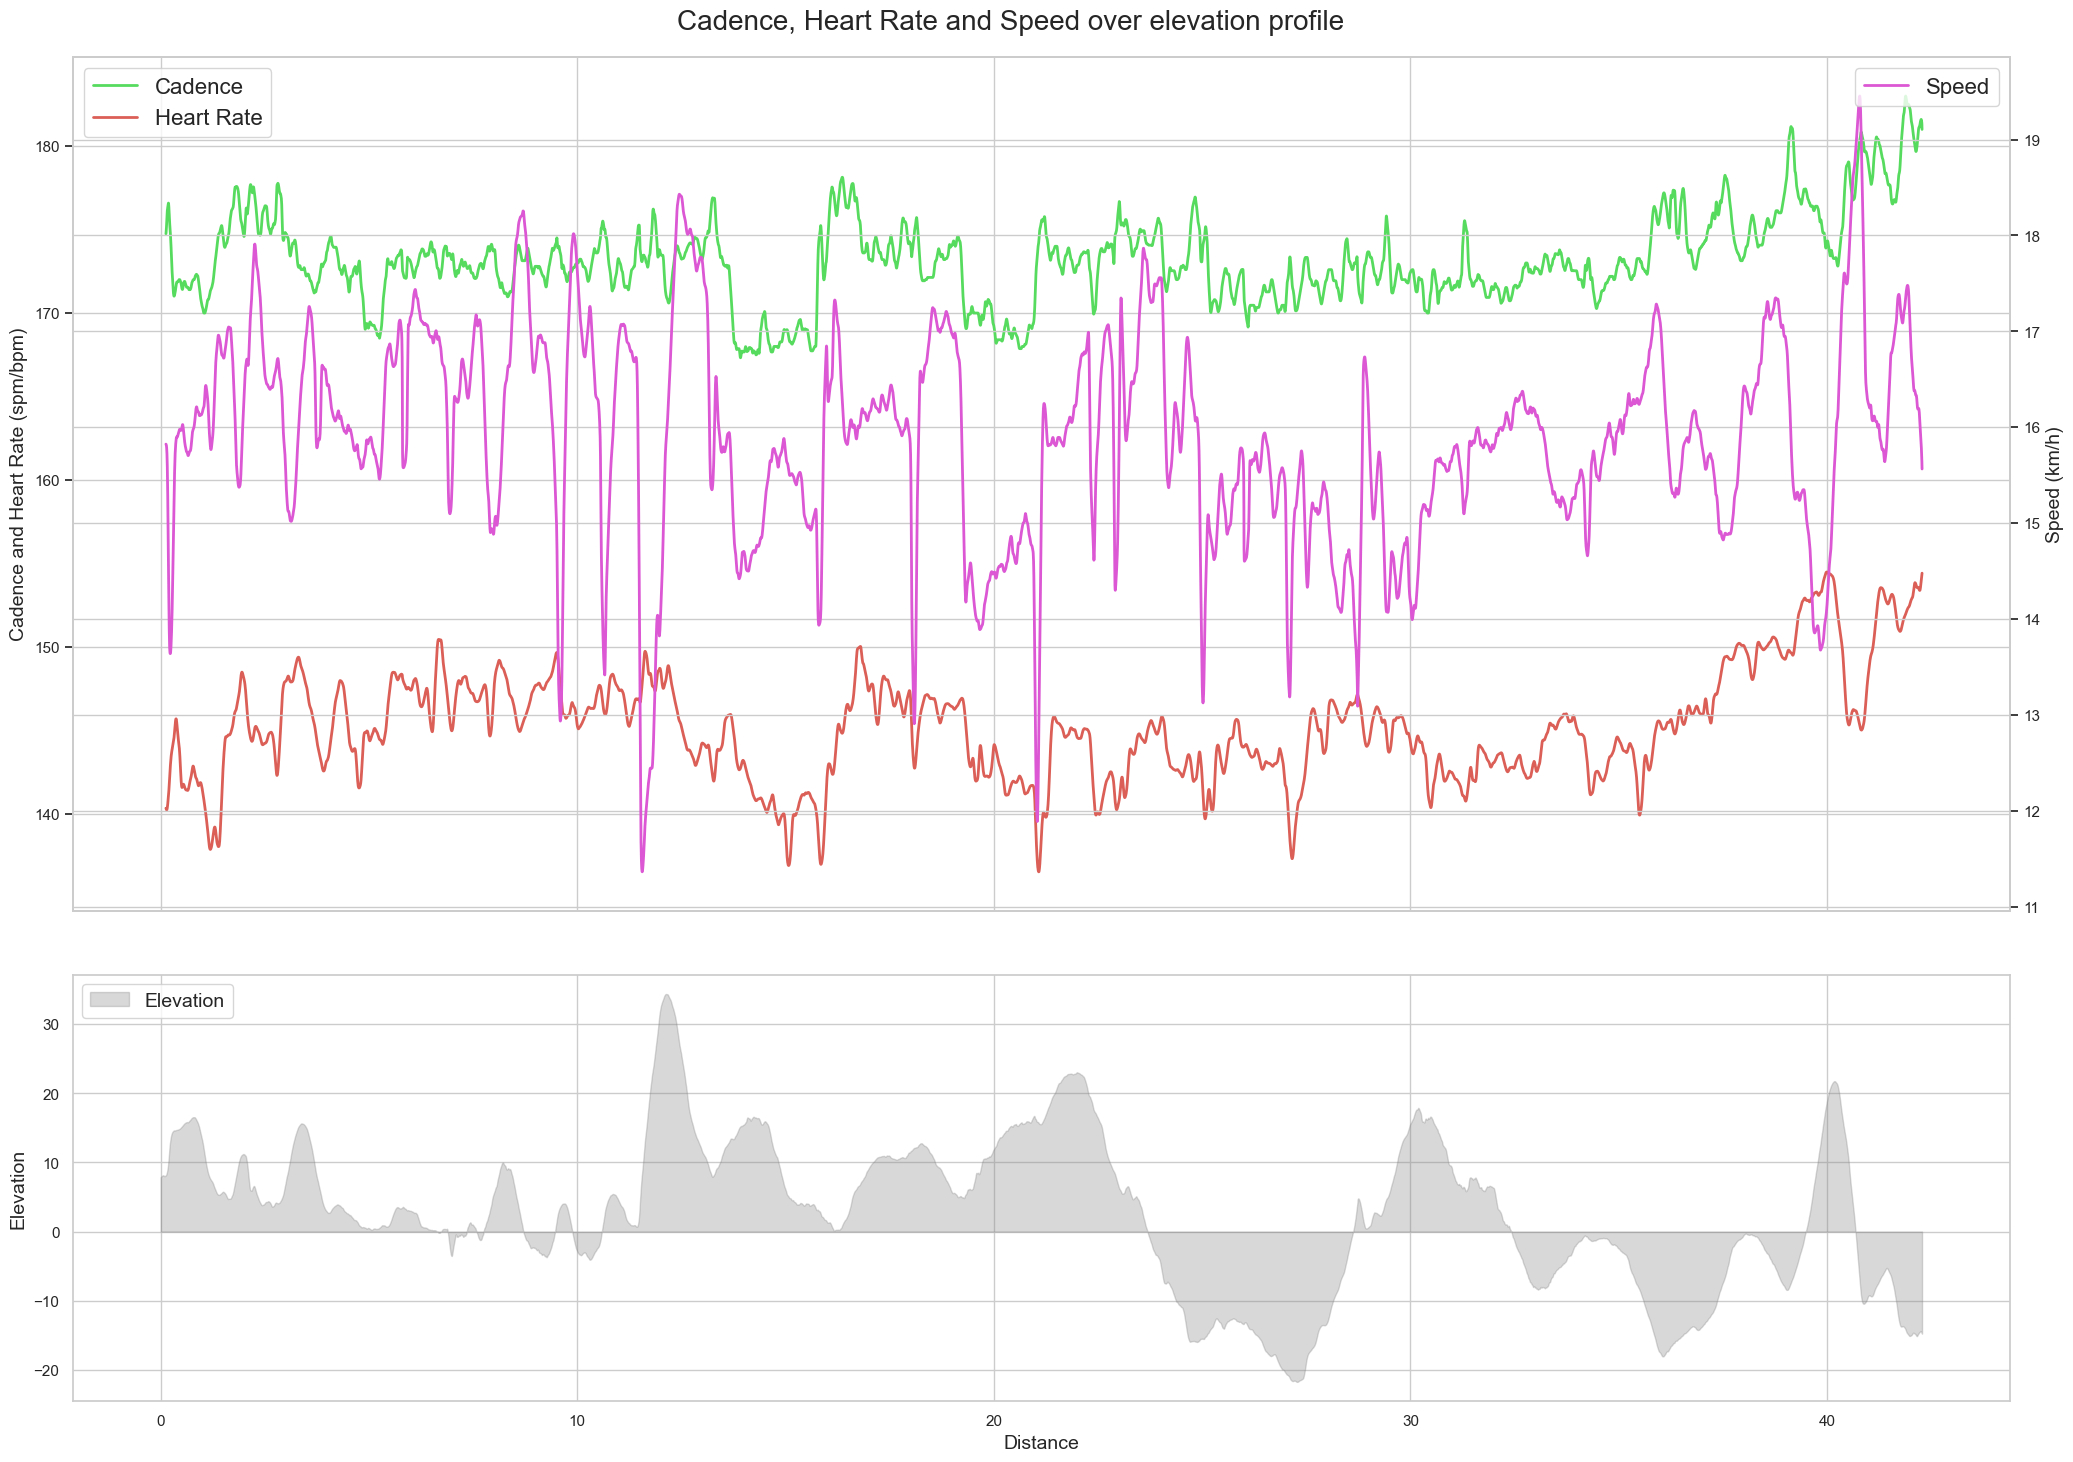

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set(style='whitegrid')

# Define color palette for the lines
colors = sns.color_palette('hls')#, n_colors=4)

fig, (ax1, ax4) = plt.subplots(2, 1, figsize=(25, 16), sharex=True, gridspec_kw={'height_ratios': [3, 1.5]})

#'speed' plot on the right y-axis with smoothed line
speed_rolling = df['speed'].rolling(window=30).mean()
ax3 = ax1.twinx()
sns.lineplot(x='distance', y=speed_rolling, data=df, label='Speed', color=colors[-1], ax=ax3, linewidth=2)
ax3.set_ylabel('Speed (km/h)', fontsize=14)
ax3_legend = ax3.legend(loc='upper right', fontsize=16)

# Plot 'cadence', 'heartrate'on left y-axis
cadence_rolling = df['cadence'].rolling(window=30).mean()
sns.lineplot(x='distance', y=cadence_rolling, data=df, label='Cadence', color=colors[2], ax=ax1, linewidth=2)
heartrate_rolling = df['heartrate'].rolling(window=30).mean()
sns.lineplot(x='distance', y=heartrate_rolling, data=df, label='Heart Rate', color=colors[0], ax=ax1, linewidth=2)
ax1.set_ylabel('Cadence and Heart Rate (spm/bpm)', fontsize=14)
ax1_legend = ax1.legend(loc='best', fontsize=16)

#'elevation' plot on the second subplot
ax4.fill_between(df['distance'], 0, df['elevation'], color='grey', alpha=0.3, label='Elevation')
ax4.set_ylabel('Elevation', fontsize=14)
ax4.set_xlabel('Distance', fontsize=14)
ax4.legend(loc='upper left', fontsize=14)

#main title
plt.suptitle('Cadence, Heart Rate and Speed over elevation profile', fontsize=20)
fig.subplots_adjust(hspace=0.1, top=0.95)

fig.savefig('plots/cadence-heart-speed.png')
plt.show()


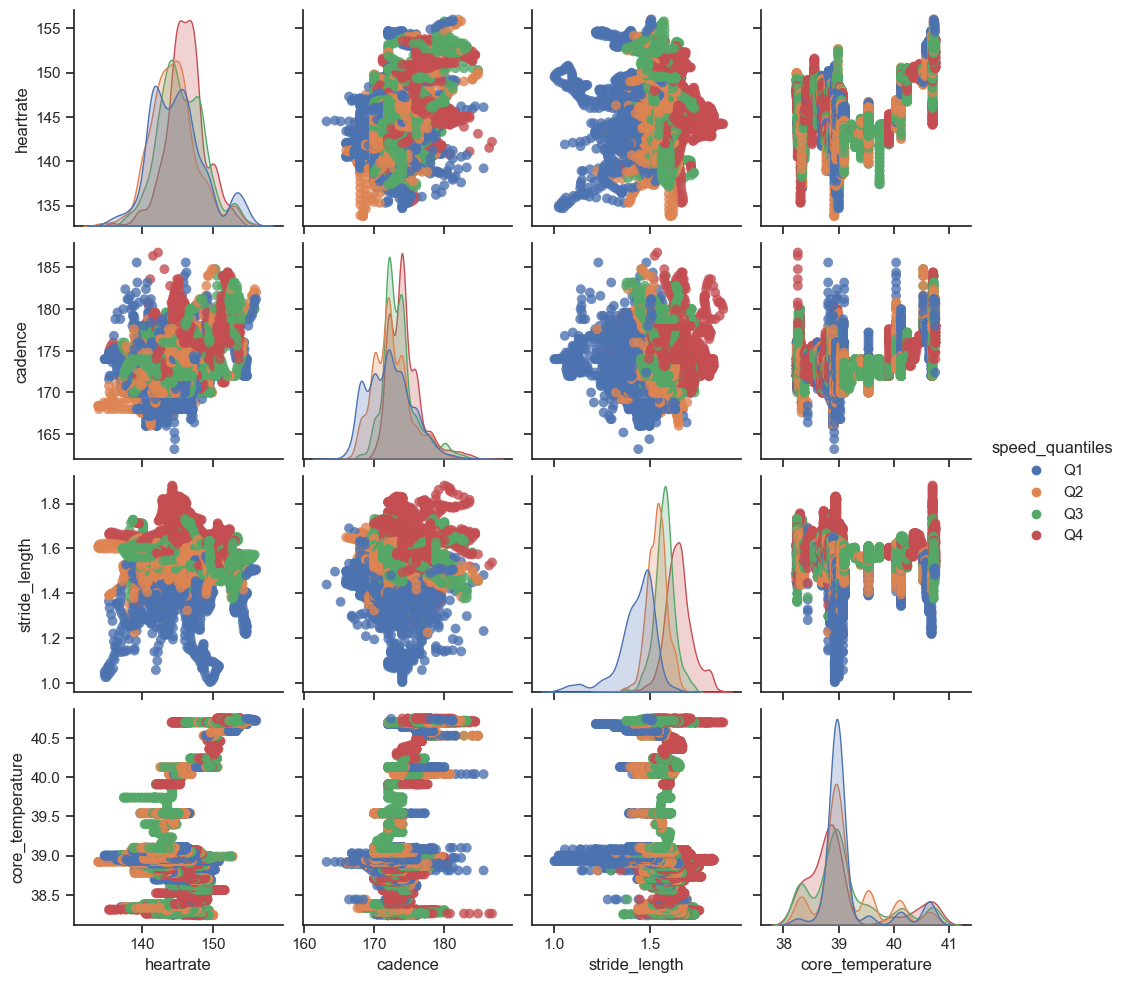

In [41]:
selected_columns = ['heartrate', 'speed_quantiles', 'cadence', 'stride_length', 'core_temperature']
quantile_labels = ['Q1', 'Q2', 'Q3', 'Q4']
df['speed_quantiles'] = pd.qcut(df['speed'], q=4, labels=quantile_labels)

subset_df = df[selected_columns]

# Create a scatterplot matrix using seaborn
sns.set(style='ticks', color_codes=True)
sns.pairplot(subset_df, diag_kind='kde',
             plot_kws={'s': 50, 'alpha': 0.8, 'linewidth': 0},
             diag_kws={'shade': True}, hue='speed_quantiles')

# Display the plot
fig.savefig('plots/pairplot.png')
plt.show()

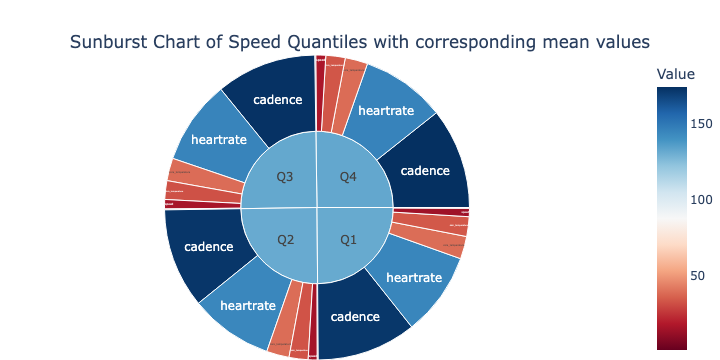

In [42]:
import plotly.express as px

data_melt = pd.melt(df, id_vars=['speed_quantiles'], value_vars=['cadence', 'stride_length', 'core_temperature', 'skin_temperature', 'heartrate', 'speed'],
                    var_name='category', value_name='value')

data_mean = data_melt.groupby(['speed_quantiles', 'category'])['value'].mean().reset_index()
data_mean.rename(columns={'value': 'mean_value'}, inplace=True)

total_distance = df.groupby('speed_quantiles')['distance'].sum().reset_index()
total_distance.rename(columns={'distance': 'total_distance'}, inplace=True)
data_mean = pd.merge(data_mean, total_distance, on='speed_quantiles')


fig = px.sunburst(data_mean, path=['speed_quantiles', 'category'], values='mean_value',
                  color='mean_value', color_continuous_scale='RdBu')

fig.update_layout(title='Sunburst Chart of Speed Quantiles with corresponding mean values',
                  title_x=0.5, title_y=0.9,
                  margin=dict(t=55, l=0, r=0, b=0),
                  coloraxis_colorbar_title='Value',
                  sunburstcolorway=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])

fig.update_traces(
    textinfo='label',
    hovertemplate='Category: %{id}<br>Mean Value: %{value:.2f}',
    insidetextorientation='horizontal'
)

fig.write_image('plots/sunburst.png')
fig.write_html('plots/sunburst.html')

fig.show()

<AxesSubplot:>

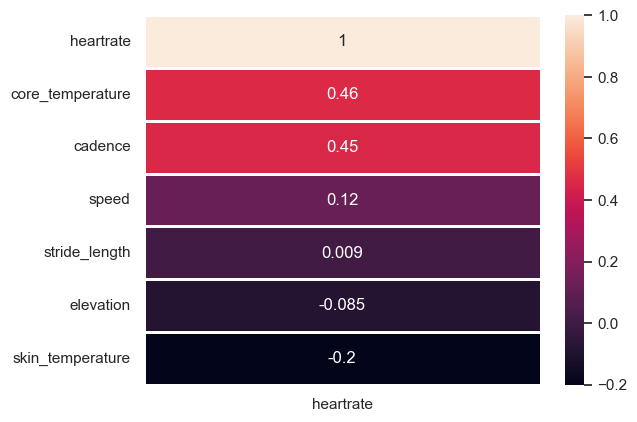

In [75]:
targets = ['stride_length', 'cadence',
           'speed', 'core_temperature',
           'skin_temperature', 'elevation', 'heartrate']

sns.heatmap(df[targets].corr()[['heartrate']].sort_values(by='heartrate', ascending=False),
            linewidths=1, annot=True)

<AxesSubplot:>

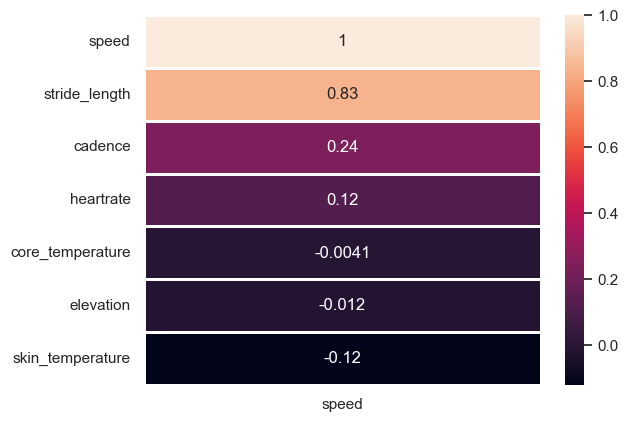

In [63]:
sns.heatmap(df[targets].corr()[['speed']].sort_values(by='speed', ascending=False),
            linewidths=1, annot=True)